In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array(np.loadtxt("../facultative_cpp/cpp_3_week/week_3/week_3/output.bin"))
data_h = np.array(np.loadtxt("../facultative_cpp/cpp_3_week/week_3/week_3/output_h.bin"))
data_consts = np.array(np.loadtxt("../facultative_cpp/cpp_3_week/week_3/week_3/output_consts.bin"))
data = data.transpose()
data_h = data_h.transpose()
t = data[0]
x = data[1]
v = data[2]
E = data[3]
omega = data_consts[2]

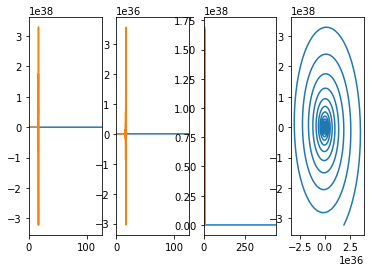

In [7]:
fig, ax = plt.subplots(1, 4)
# ax[0].set_ylim(-50 , 50)
# ax[1].set_ylim(-50, 50)
ax[0].set_xlim(0 * np.pi , 40 * np.pi)
ax[1].set_xlim(0 * np.pi , 40 * np.pi)
ax[2].set_xlim(0 * np.pi , 140 * np.pi)
ax[0].plot(t, - x[0] * omega * np.sin(omega * t))
ax[1].plot(t, x[0] * np.cos(omega * t))
ax[2].plot(t, [x[0]**2/(2 * omega**2)] * len(t))
ax[0].plot(t, v)
ax[1].plot(t, x)
ax[2].plot(t, E)
ax[3].plot(x, v)

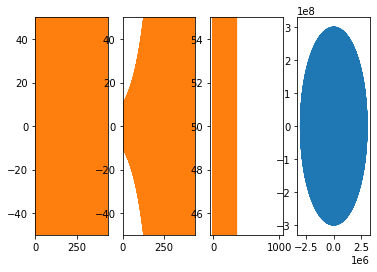

In [4]:
fig, ax = plt.subplots(1, 4)
t_h = data_h[0]
x_h = data_h[1]
v_h = data_h[2]
E_h = data_h[3]
ax[0].set_ylim(-50 , 50)
ax[1].set_ylim(-50, 50)
ax[2].set_ylim(45, 55)
ax[0].set_xlim(0 * np.pi , 140 * np.pi)
ax[1].set_xlim(0 * np.pi , 140 * np.pi)
ax[0].plot(t_h, - x_h[0] * omega * np.sin(omega * t_h))
ax[1].plot(t_h, x_h[0] * np.cos(omega * t_h))
ax[2].plot(t_h, [x_h[0]**2/(2 * omega**2)] * len(t))
ax[0].plot(t_h, v_h)
ax[1].plot(t_h, x_h)
ax[2].plot(t_h, E_h)
ax[3].plot(x_h, v_h)

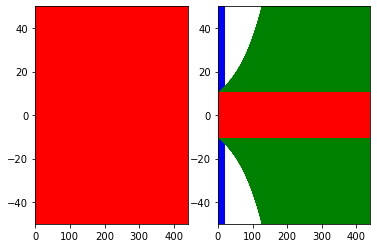

In [5]:
fig, ax = plt.subplots(1, 2)
ax[0].set_ylim(-50 , 50)
ax[1].set_ylim(-50, 50)
ax[0].set_xlim(0 * np.pi , 140 * np.pi)
ax[1].set_xlim(0 * np.pi , 140 * np.pi)
ax[0].plot(t, v, color="b")
ax[1].plot(t, x, color="b")
ax[0].plot(t_h, v_h, color="g")
ax[1].plot(t_h, x_h, color="g")
ax[0].plot(t_h, - x_h[0] * omega * np.sin(omega * t_h), color="r")
ax[1].plot(t_h, x_h[0] * np.cos(omega * t_h), color="r")
